In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('sonar_csv.csv')
df.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [3]:
df.tail()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,Mine


In [4]:
df.shape

(208, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
attribute_1     208 non-null float64
attribute_2     208 non-null float64
attribute_3     208 non-null float64
attribute_4     208 non-null float64
attribute_5     208 non-null float64
attribute_6     208 non-null float64
attribute_7     208 non-null float64
attribute_8     208 non-null float64
attribute_9     208 non-null float64
attribute_10    208 non-null float64
attribute_11    208 non-null float64
attribute_12    208 non-null float64
attribute_13    208 non-null float64
attribute_14    208 non-null float64
attribute_15    208 non-null float64
attribute_16    208 non-null float64
attribute_17    208 non-null float64
attribute_18    208 non-null float64
attribute_19    208 non-null float64
attribute_20    208 non-null float64
attribute_21    208 non-null float64
attribute_22    208 non-null float64
attribute_23    208 non-null float64
attribute_24    208 non-null float64
attribu

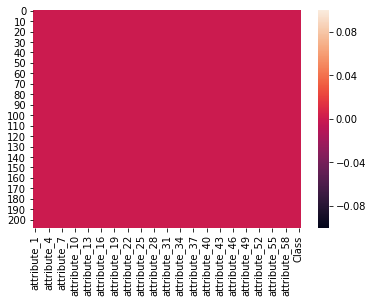

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


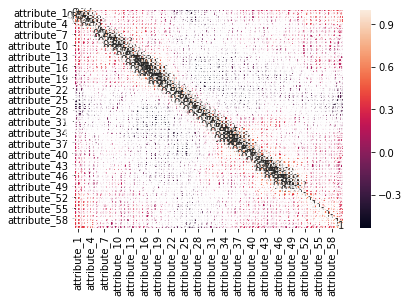

In [8]:
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278C4F24160>,
      dtype=object)

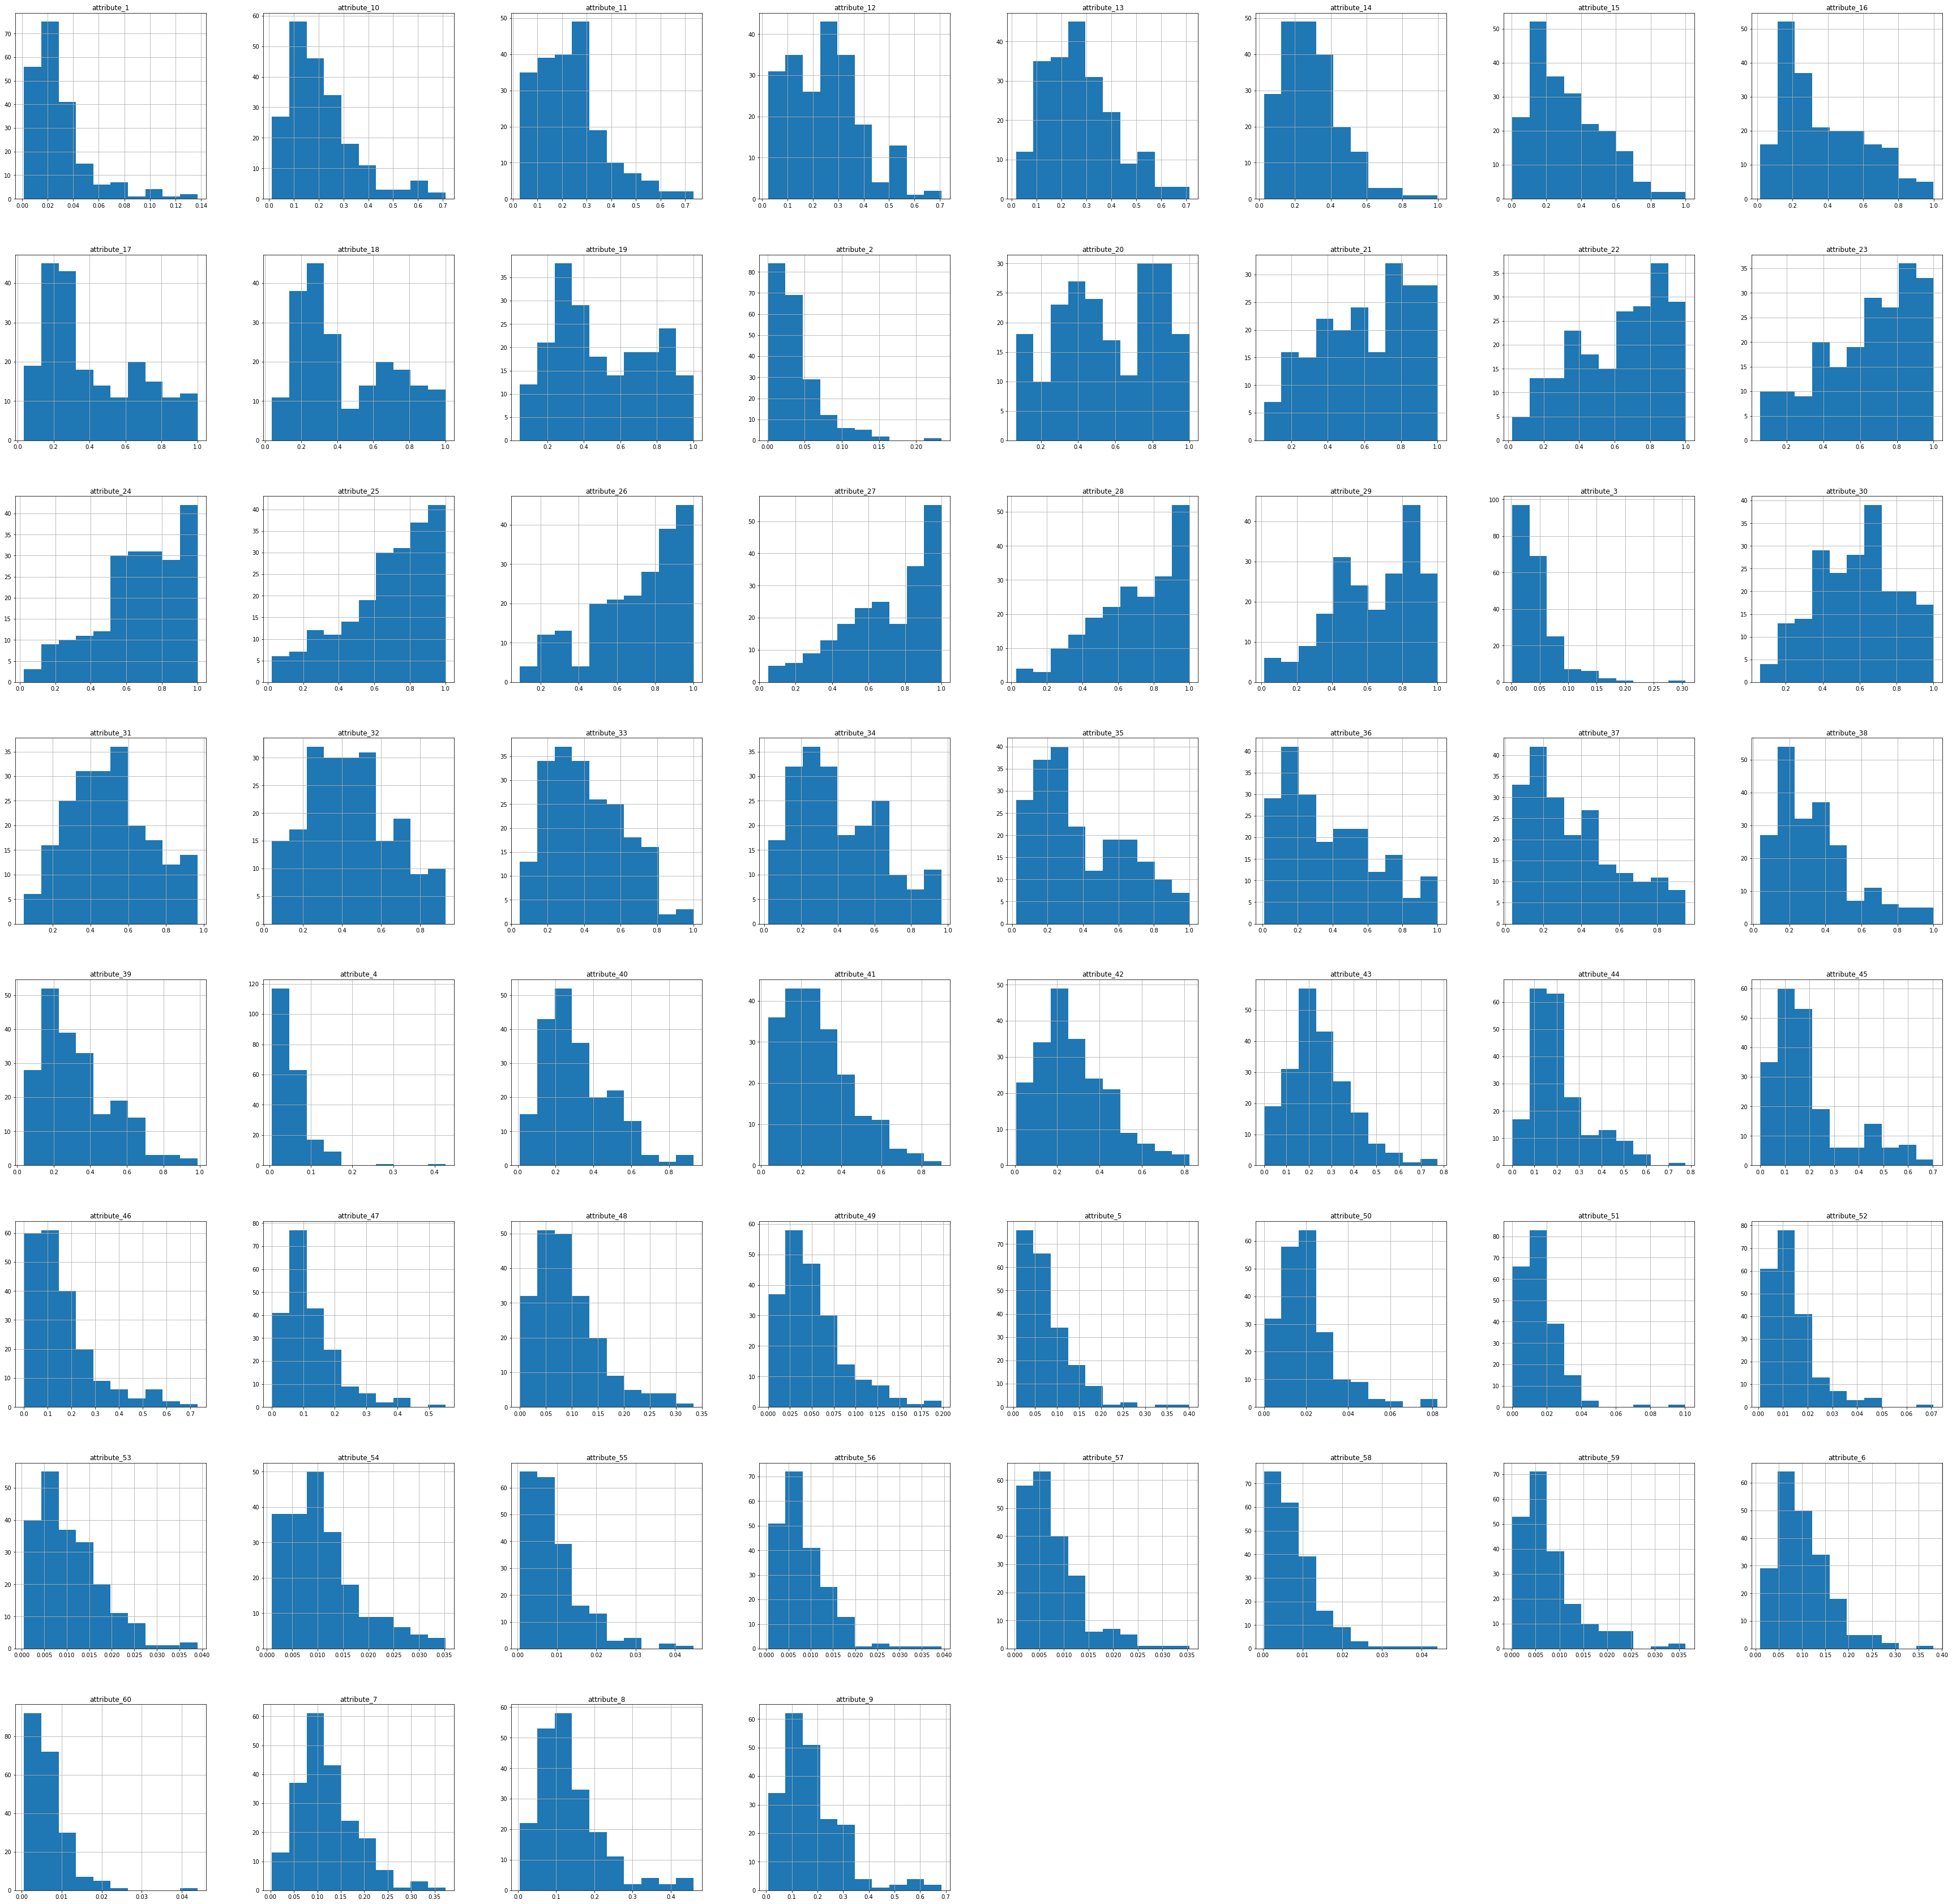

In [9]:
df.hist(figsize=(61,61))

In [10]:
x=df.iloc[:,0:-1]
x.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca=PCA(6)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [13]:
y=df.iloc[:,-1]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: Class, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=239,stratify=y)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 6)
(166,)
(42, 6)
(42,)


In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score

In [18]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    train=ml.score(x_train,y_train)
    pre=ml.predict(x_test)
    a= accuracy_score(y_test,pre)
    cm=sns.heatmap(confusion_matrix(y_test,pre),annot=True)
    cr=classification_report(y_test,pre)
    f1=f1_score(y_test,pre)
    ps=precision_score(y_test,pre)
    return print('Traning_score = ',train ,'\n\nAccuracy_score = ',a,'\n\nClassification_Report =\n',cr,'\n\nF1_score = ',f1,'\n\nPrecision_score = ',ps,'\n\nConfusion_Matrix',cm)


Traning_score =  0.7530120481927711 

Accuracy_score =  0.7142857142857143 

Classification_Report =
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.67      0.80      0.73        20

   micro avg       0.71      0.71      0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42
 

F1_score =  0.7272727272727272 

Precision_score =  0.6666666666666666 

Confusion_Matrix AxesSubplot(0.125,0.125;0.62x0.755)


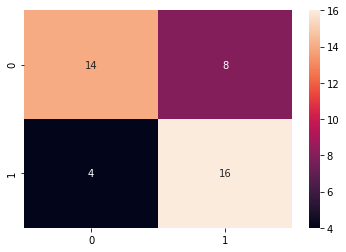

In [19]:
from sklearn.linear_model import LogisticRegression
model(LogisticRegression())

Traning_score =  0.7710843373493976 

Accuracy_score =  0.7857142857142857 

Classification_Report =
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.72      0.90      0.80        20

   micro avg       0.79      0.79      0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.81      0.79      0.78        42
 

F1_score =  0.7999999999999999 

Precision_score =  0.72 

Confusion_Matrix AxesSubplot(0.125,0.125;0.62x0.755)


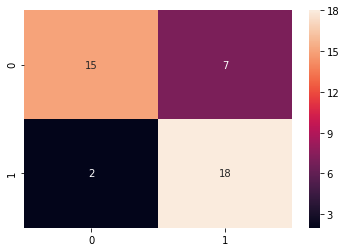

In [20]:
from sklearn.naive_bayes import GaussianNB
model(GaussianNB())

Traning_score =  0.9819277108433735 

Accuracy_score =  0.9761904761904762 

Classification_Report =
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.95      1.00      0.98        20

   micro avg       0.98      0.98      0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42
 

F1_score =  0.975609756097561 

Precision_score =  0.9523809523809523 

Confusion_Matrix AxesSubplot(0.125,0.125;0.62x0.755)


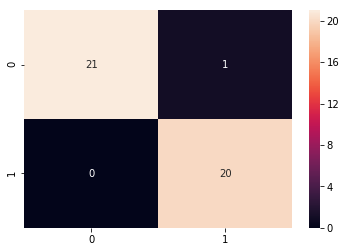

In [21]:
from sklearn.svm import SVC
b=model(SVC())

Traning_score =  0.891566265060241 

Accuracy_score =  0.9523809523809523 

Classification_Report =
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.95      0.95      0.95        20

   micro avg       0.95      0.95      0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42
 

F1_score =  0.9500000000000001 

Precision_score =  0.95 

Confusion_Matrix AxesSubplot(0.125,0.125;0.62x0.755)


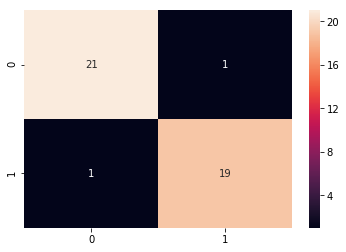

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model(KNeighborsClassifier())

Traning_score =  1.0 

Accuracy_score =  0.8333333333333334 

Classification_Report =
               precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.88      0.75      0.81        20

   micro avg       0.83      0.83      0.83        42
   macro avg       0.84      0.83      0.83        42
weighted avg       0.84      0.83      0.83        42
 

F1_score =  0.8108108108108107 

Precision_score =  0.8823529411764706 

Confusion_Matrix AxesSubplot(0.125,0.125;0.62x0.755)


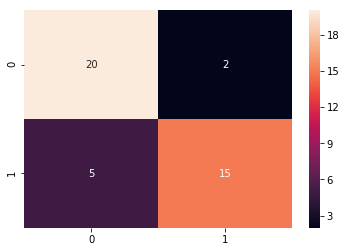

In [23]:
from sklearn.tree import DecisionTreeClassifier
model(DecisionTreeClassifier())

In [24]:
model=[LogisticRegression(),
       GaussianNB(),
       DecisionTreeClassifier(),
       SVC(),
       KNeighborsClassifier()]

In [25]:
F1_score=[]
Accuracy_score=[]
models=['LogisticRegression',
       'GaussianNB',
       'DecisionTreeClassifier',
       'SVC',
       'KNeighborsClassifier']
for i in model:
    ml=i
    ml.fit(x_train,y_train)
    pre=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pre))
    Accuracy_score.append(accuracy_score(y_test,pre))

In [26]:
result=pd.DataFrame({'Model':models,'F1_score':F1_score,'Accuracy_score':Accuracy_score})
result

,Model,F1_score,Accuracy_score
0,LogisticRegression,0.727273,0.714286
1,GaussianNB,0.800000,0.785714
2,DecisionTreeClassifier,0.842105,0.857143
3,SVC,0.975610,0.976190
4,KNeighborsClassifier,0.950000,0.952381


I select SVC as final Model

I get maximum f1_score and accuracy_score in SVC as compared to other model

Accuracy_score = 0.976190

F1_score = 0.975610